# Predict Angina Chest Pain Type Based on Blood Pressure & Cholesterol 

## Introduction:

Recently, with the fast development in healthcare systems, the public has started to insert more attention towards healthcare, especially the disease which can take people’s life away. With research being conducted, heart disease in particular, has become the second major cause of death. Therefore, we decided to build a model related to one heart disease, Angina. 

Angina, also known as pectoris, is a heart disease that makes patients feel strong, squeezed chest pain. If the case is severe, hospitalization is required. Patients might experience dizziness, nausea, shortness of breath as symptoms. Furthermore, there are four types of angina, the typical, atypical, non-anginal pain, and lastly asymptomatic. 

**Typical angina**, also known as classic chest pain consists of 3 main criteria: 
* It is a substernal chest discomfort or pain
* It is mainly caused from emotional stress or exertion
* Symptoms can be relieved from nitroglycerine or rest (or both)

**Atypical angina**, also known as probable chest pain consists of 2 out of the 3 criteria found in a typical angina.

**non-anginal** chest pain refers to pain that has very similar symptoms to typical angina, but with a shorter period and doesn’t satisfy any of the 3 criteria of classic chest pain.

**asymptomatic chest pain** occurs when the patient shows no signs of common angina symptoms.

### Question:

Given measurements of a patient’s resting blood pressure and cholesterol levels, what type of chest pain would the patient be experiencing?

### Dataset Used:

We will use "Heart Attack Analysis & Prediction Dataset" to answer the question 

## Preliminary exploratory data analysis:

Running initial packages

In [7]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source("tests.R")
source("cleanup.R")

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'tests.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


Load training and test data

In [17]:
url <- "https://raw.githubusercontent.com/AlexLuo602/group26v2/main/heart.csv"

download.file(url, destfile = "heart.csv")

heart_csv <- read_csv("heart.csv") %>% 
    mutate(chest.pain.type = as_factor(cp)) %>% 
    select(chest.pain.type, chol, trtbps)
    

heart_split <- initial_split(heart_csv, prop = 0.75, strata = chest.pain.type)  
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

heart_train
heart_test

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trtbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalachh = col_double(),
  exng = col_double(),
  oldpeak = col_double(),
  slp = col_double(),
  caa = col_double(),
  thall = col_double(),
  output = col_double()
)



chest.pain.type,chol,trtbps
<fct>,<dbl>,<dbl>
3,233,145
2,250,130
1,204,130
⋮,⋮,⋮
3,264,110
0,193,144
0,131,130


chest.pain.type,chol,trtbps
<fct>,<dbl>,<dbl>
0,192,140
1,294,140
2,199,172
⋮,⋮,⋮
0,176,164
0,241,140
1,236,130


Created a plot with the standardized predictors in the axes and colored using chest pain type.

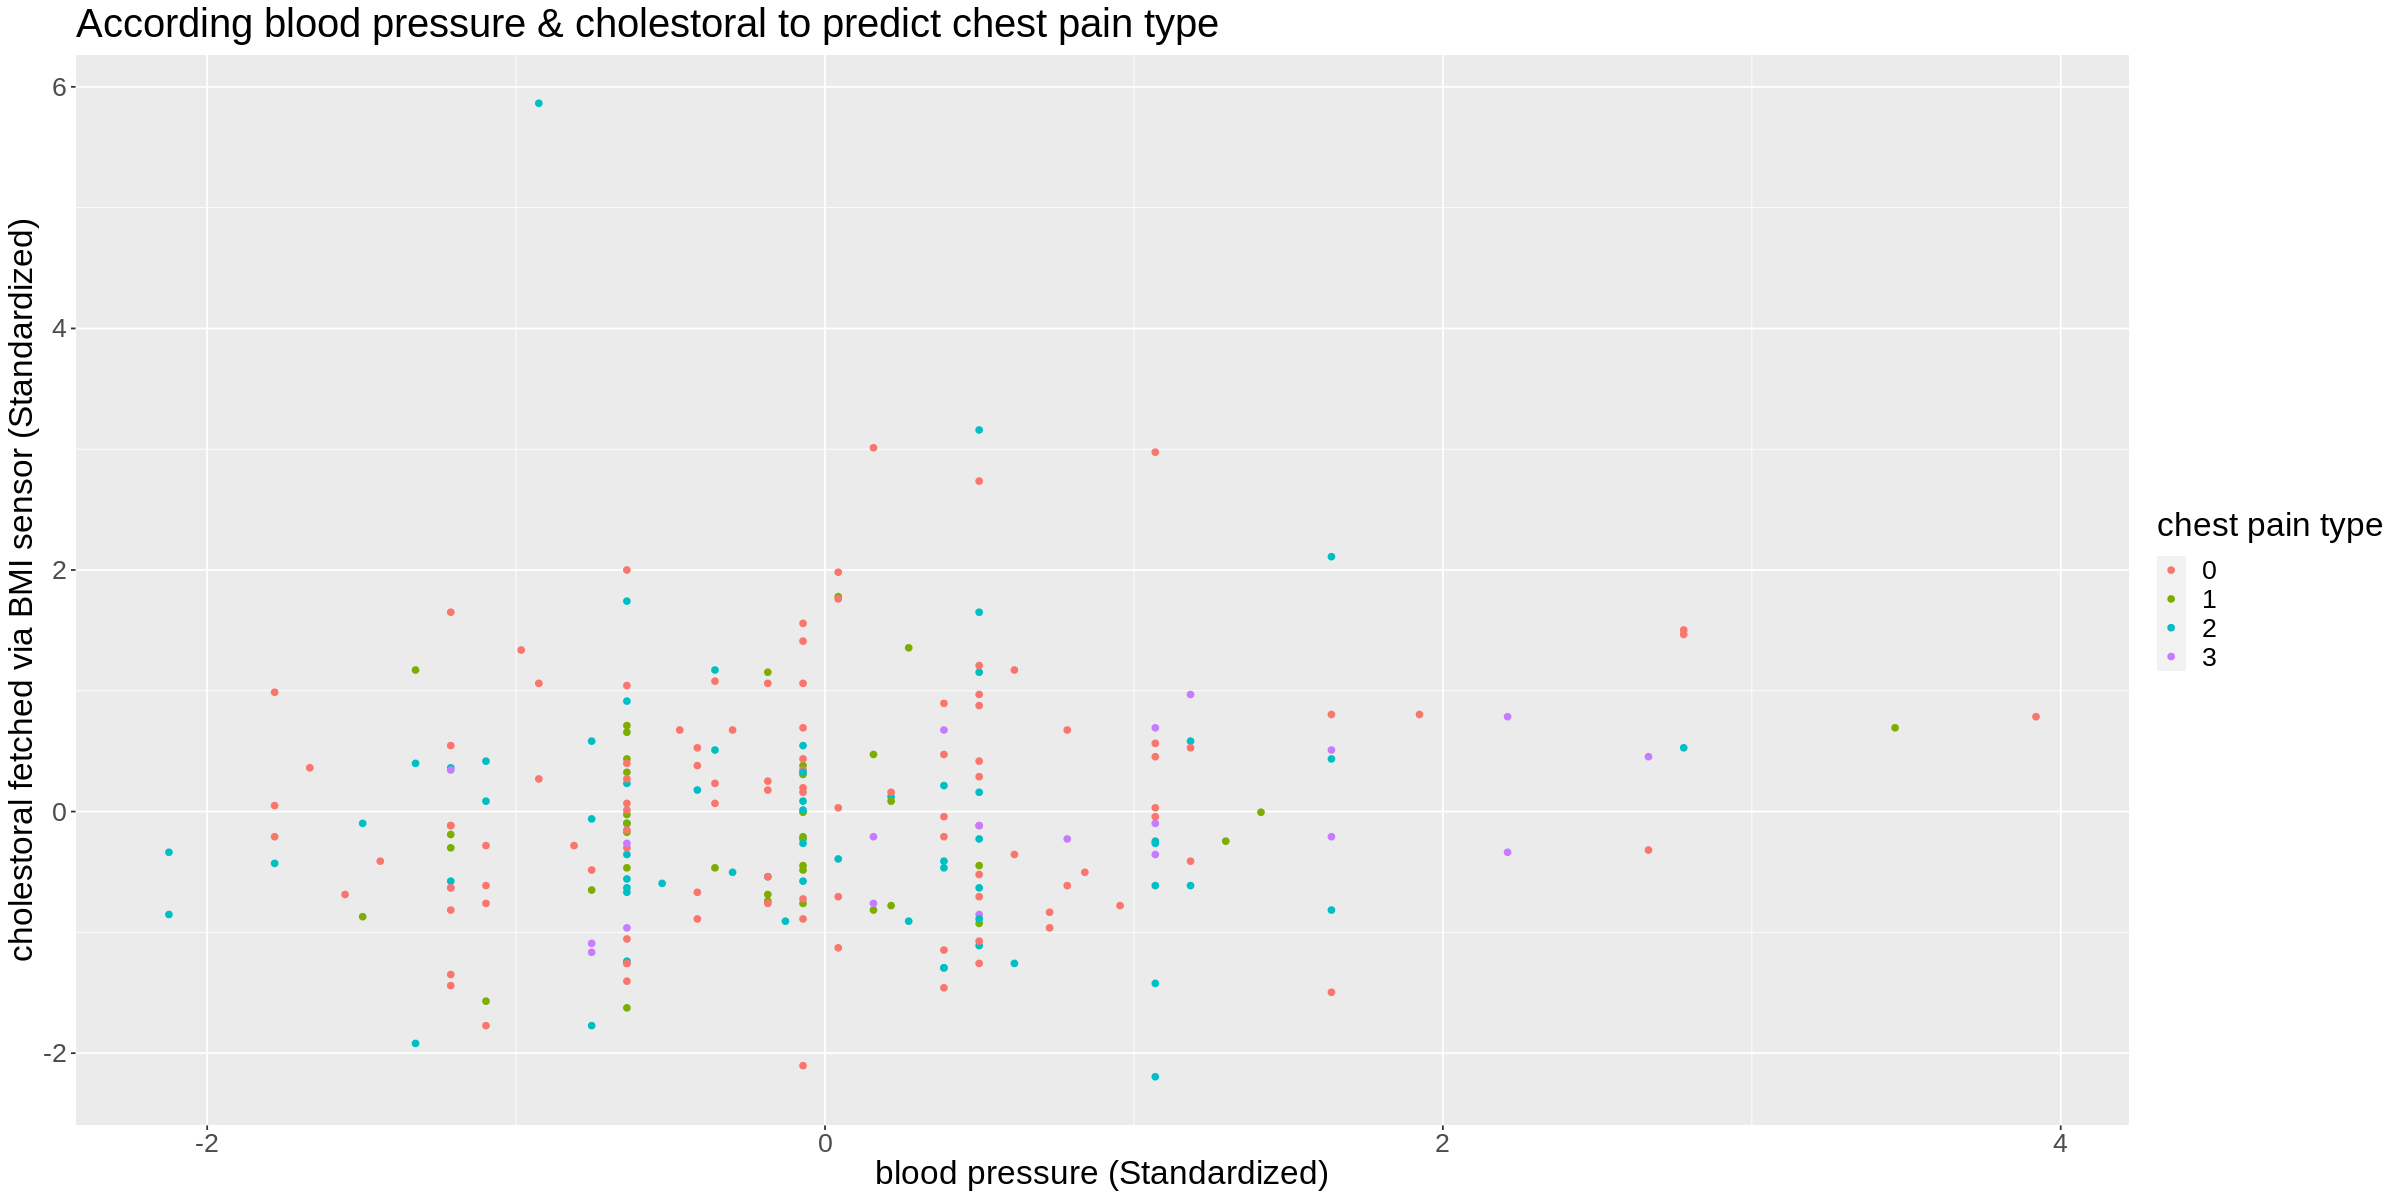

In [20]:
options(repr.plot.width = 20, repr.plot.height = 10)

heart_recipe <- recipe(chest.pain.type ~ trtbps + chol, data = heart_train) %>% 
    step_scale(all_predictors()) %>% 
    step_center(all_predictors()) %>% 
    prep() %>% 
    bake(heart_train)

plot_trtbps_chol <- heart_recipe %>%
ggplot(aes(x=trtbps, y= chol, colour= chest.pain.type))+
    geom_point()+
    labs(x= "blood pressure (Standardized)", y= "cholestoral fetched via BMI sensor (Standardized)", 
         colour="chest pain type")+
    ggtitle("According blood pressure & cholestoral to predict chest pain type")+
    theme(text=element_text(size=20))

plot_trtbps_chol

Summarize the number of observations in each class

In [22]:
summarized_heart <- heart_train %>% 
    group_by(chest.pain.type) %>% 
    summarize(count = n())

summarized_heart

`summarise()` ungrouping output (override with `.groups` argument)



chest.pain.type,count
<fct>,<int>
0,106
1,37
2,65
3,21


## Method

## Expected outcomes and significance:

**What do we expect to find?**

We expect to based on the known measurements of blood pressure and cholesterol of a patient to predict which chest pain type should be. 

**What impact could such findings have?**

Although extensive tests should still be performed by a medically licensed doctor to officially diagnose a patient, patients with mild chest pain can self-diagnose the type of chest pain they are experiencing through resting blood pressure and cholesterol measurements. They can then do the necessary self treatments without traveling to the doctor to get checked up, making it more convenient for the patient.

**What future questions could this lead to?**

Since this model is not 100% accurate, if the symptoms continue to get worse, then a professional diagnosis at hospital is required. This is only an unprofessional, first stepped analysis, therefore cannot be treated as final report. Our model only concerns female patients' chest pain type, so it may not apply to male patients.
FQ: Would changing or adding more predictors can help to predict angina types for all genders?
